In [1]:
# Import the required libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

import face_recognition

from functions import (
    preprocess_to_lfw,
    get_image_embeddings
)

In [2]:
# Check if the model variable exists and if it contains a Keras model
name_of_model = 'vgg19'

# Load the model
model_path = f'model_{name_of_model}/{name_of_model}.keras'

# Print model path
print(f'Selected model: {model_path}')

# Load the model
model = tf.keras.models.load_model(model_path)

Selected model: model_vgg19/vgg19.keras


### `Load and preprocess an image`

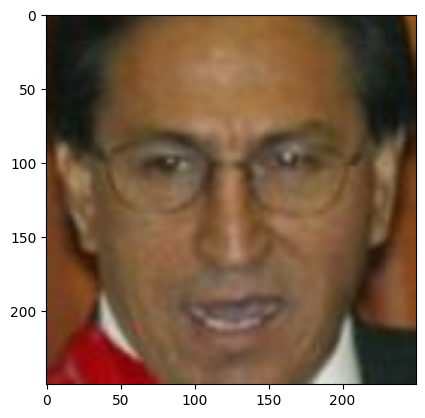

(<matplotlib.image.AxesImage at 0x2269d62d420>, None)

In [4]:
# Load an image and preprocess it
number = 'a'
image_path = f'images/{number}.jpg'

# Load the image
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError("Image not found or invalid path.")

# Preprocess the image
image = preprocess_to_lfw(image)

# Display the preprocessed image
plt.imshow(image/255), plt.show()

In [5]:
# Convert to TensorFlow tensor
image = tf.convert_to_tensor(image)

# Resize the image to (128, 128) using tf.image.resize
resized_image = tf.image.resize(image, [128, 128])

# Add a batch dimension using tf.expand_dims
image = tf.expand_dims(resized_image, axis=0) # Add batch dimension

### `Make predictions using the model`

In [6]:
preds = model.predict(image)
preds = preds[0]

class_names = ['Alejandro_Toledo',
 'Andre_Agassi',
 'Angelina_Jolie',
 'Ariel_Sharon',
 'Arnold_Schwarzenegger',
 'Atal_Bihari_Vajpayee',
 'Bill_Clinton',
 'Carlos_Menem',
 'Colin_Powell',
 'David_Beckham',
 'George_W_Bush',
 'Gloria_Macapagal_Arroyo',
 'Guillermo_Coria',
 'Hamid_Karzai',
 'Hans_Blix',
 'Hugo_Chavez',
 'Igor_Ivanov',
 'Jack_Straw',
 'Jean_Chretien',
 'Jennifer_Aniston',
 'Jennifer_Lopez',
 'John_Ashcroft',
 'Jose_Maria_Aznar',
 'Juan_Carlos_Ferrero',
 'Junichiro_Koizumi',
 'Laura_Bush',
 'Lindsay_Davenport',
 'Lleyton_Hewitt',
 'Luiz_Inacio_Lula_da_Silva',
 'Megawati_Sukarnoputri',
 'Michael_Bloomberg',
 'Naomi_Watts',
 'Nestor_Kirchner',
 'Paul_Bremer',
 'Pete_Sampras',
 'Recep_Tayyip_Erdogan',
 'Ricardo_Lagos',
 'Roh_Moo-hyun',
 'Rudolph_Giuliani',
 'Saddam_Hussein',
 'Serena_Williams',
 'Tiger_Woods',
 'Tom_Daschle',
 'Tom_Ridge',
 'Tony_Blair',
 'Vladimir_Putin']

top = 5
top_indices = preds.argsort()[-top:][::-1]

print("Top Predictions:")
for j, i in enumerate(top_indices, 1):  # Start numbering from 1
    class_name = class_names[i]
    probability = preds[i]
    # Pad class names with spaces for alignment
    print(f"{j}. {class_name:{30}} : {probability:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step
Top Predictions:
1. Alejandro_Toledo               : 0.7295
2. Tony_Blair                     : 0.0946
3. Arnold_Schwarzenegger          : 0.0655
4. Gloria_Macapagal_Arroyo        : 0.0146
5. Hugo_Chavez                    : 0.0145


### `embedding_extractor`

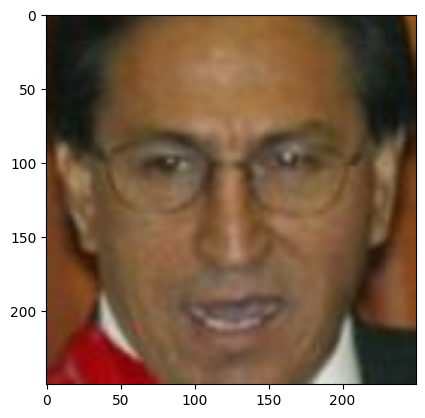

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


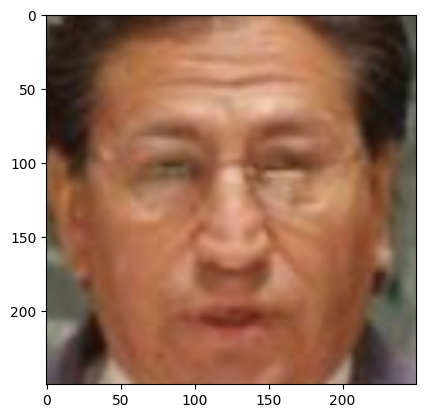

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


In [7]:

name_of_model = 'vgg19'
model_path = f'model_{name_of_model}/{name_of_model}.keras'
model = tf.keras.models.load_model(model_path)

# Load the image 1
image_path_1 = 'images/a.jpg'
image_1 = cv2.imread(image_path_1)

# Load the image 2
image_path_2 = 'images/b.jpg'
image_2 = cv2.imread(image_path_2)

encoding_1 = get_image_embeddings(model, image_1, True)
encoding_2 = get_image_embeddings(model, image_2, True)

In [ ]:
# Compute the Euclidean distance between the two encodings  
distance = tf.norm(encoding_1 - encoding_2).numpy()

print(f"The distance between the two images is: {distance:.4f}")

# Compute the cosine similarity between the two encodings
cosine_similarity = tf.tensordot(encoding_1, encoding_2, axes=1).numpy() / (tf.norm(encoding_1).numpy() * tf.norm(encoding_2).numpy())      

print(f"The cosine similarity between the two images is: {cosine_similarity:.4f}")

The distance between the two images is: 7.1912
The cosine similarity between the two images is: 0.6162


In [ ]:
# Set a threshold for similarity
threshold = 0.5

# Compare the cosine similarity with the threshold
is_similar = cosine_similarity > threshold

print(f"Are the faces similar? {'Yes' if is_similar else 'No'}")

Are the faces similar? Yes
